In [58]:
import pandas as pd
import shap
import numpy as np 
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [59]:
processed_data = pd.read_csv("C:/Users/user/Desktop/MiniProject Data Scientist/Classification Project/Data/processed/processed_data.csv")
processed_data.reset_index(drop = True, inplace = True)
processed_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [60]:
cat_cols = processed_data.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
    processed_data[col] = processed_data[col].astype("category")

print("Categorical columns:", cat_cols)
processed_data.columns

Categorical columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [61]:
X = processed_data.drop(columns = ["Attrition"])
y = processed_data["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42 , test_size = 0.2 , stratify = y)
lgb = LGBMClassifier()
lgb.fit(X_train, y_train , categorical_feature= cat_cols)
y_pred = lgb.predict(X_test)

[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1140
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161565 -> initscore=-1.646632
[LightGBM] [Info] Start training from score -1.646632


In [62]:
# Validate results
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.67      0.26      0.37        47

    accuracy                           0.86       294
   macro avg       0.77      0.62      0.65       294
weighted avg       0.84      0.86      0.83       294



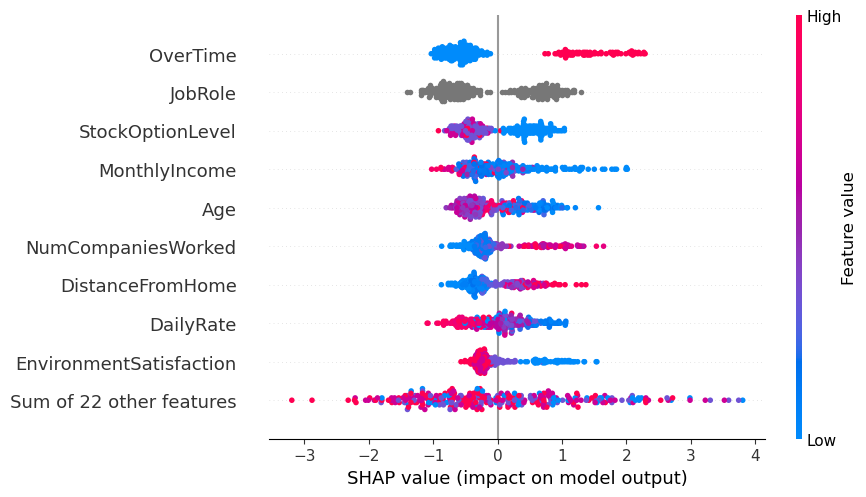

In [63]:
explainer = shap.Explainer(lgb)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)

In [64]:
shap_importance = np.abs(shap_values.values).mean(axis =0)
feature_col = X_test.columns.tolist()
feature_importance = pd.DataFrame({
        'Feature': feature_col,
        'SHAP Value': shap_importance
    })

feature_importance.sort_values(by = 'SHAP Value', ascending = False, inplace = True)
print(f"Top Features influence the model:\n{feature_importance['Feature'].head()}")
    

Top Features influence the model:
18            OverTime
12             JobRole
23    StockOptionLevel
15       MonthlyIncome
0                  Age
Name: Feature, dtype: object
